# Problem Statement:                       
>> Pick a large volume document of your choice and create a corpus/dictionary using appropriate packages and find:    
    >> a)  similarities of at least 20 tokens    
    >> b)  Plot 2D graph to see words similarity of at least 20 words    

In [1]:
# Importing Libraries
import nltk
import pandas as pd
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
# Reading file
document = open('NLP/text_7.txt', encoding="utf-8").read()

# Removing Punctuation
text = re.sub(r'\[[0-9]*\]',' ',document)
text = re.sub(r'\s+',' ',text)
text = text.lower()
text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)


In [3]:
# Printing the document after removing punctions...
text

'what policy planners in delhi, and possibly those in beijing, have long feared, viz., a direct confrontation leading to fatal casualties, occurred in the galwan heights in the late evening of june . the number of casualties, on the indian side was the highest since , and included that of a high ranking colonel of the bihar regiment. the number of casualties on the chinese side has not been formally indicated, though they have conceded that at least one colonel was among those killed. no aberration with this incident, it should have been obvious that the die was cast as regards the future of china-india relations. nevertheless, there was a flicker of hope when apparently the corps commanders of india and china on june - appeared to reach a “mutual consensus” to disengage and embark on lowering “tensions” through a “gradual and verifiable disengagement”. this proved shortlived, with the chinese post in the galwan area not only being restored, but also, from satellite images available, b

In [4]:
# Performimg Sentence tokenization.... 
sentences = nltk.sent_tokenize(text)
sentences

['what policy planners in delhi, and possibly those in beijing, have long feared, viz., a direct confrontation leading to fatal casualties, occurred in the galwan heights in the late evening of june .',
 'the number of casualties, on the indian side was the highest since , and included that of a high ranking colonel of the bihar regiment.',
 'the number of casualties on the chinese side has not been formally indicated, though they have conceded that at least one colonel was among those killed.',
 'no aberration with this incident, it should have been obvious that the die was cast as regards the future of china-india relations.',
 'nevertheless, there was a flicker of hope when apparently the corps commanders of india and china on june - appeared to reach a “mutual consensus” to disengage and embark on lowering “tensions” through a “gradual and verifiable disengagement”.',
 'this proved shortlived, with the chinese post in the galwan area not only being restored, but also, from satellit

In [5]:
# Performimg Sentence tokenization....
word_new = [nltk.word_tokenize(sentence) for sentence in sentences]
word_new

[['what',
  'policy',
  'planners',
  'in',
  'delhi',
  ',',
  'and',
  'possibly',
  'those',
  'in',
  'beijing',
  ',',
  'have',
  'long',
  'feared',
  ',',
  'viz.',
  ',',
  'a',
  'direct',
  'confrontation',
  'leading',
  'to',
  'fatal',
  'casualties',
  ',',
  'occurred',
  'in',
  'the',
  'galwan',
  'heights',
  'in',
  'the',
  'late',
  'evening',
  'of',
  'june',
  '.'],
 ['the',
  'number',
  'of',
  'casualties',
  ',',
  'on',
  'the',
  'indian',
  'side',
  'was',
  'the',
  'highest',
  'since',
  ',',
  'and',
  'included',
  'that',
  'of',
  'a',
  'high',
  'ranking',
  'colonel',
  'of',
  'the',
  'bihar',
  'regiment',
  '.'],
 ['the',
  'number',
  'of',
  'casualties',
  'on',
  'the',
  'chinese',
  'side',
  'has',
  'not',
  'been',
  'formally',
  'indicated',
  ',',
  'though',
  'they',
  'have',
  'conceded',
  'that',
  'at',
  'least',
  'one',
  'colonel',
  'was',
  'among',
  'those',
  'killed',
  '.'],
 ['no',
  'aberration',
  'with',


In [6]:
# Now removing extra words using stopwords...
# Stop Words that are used in this script...
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now","also",'i', 'me', 'my', 'myself', 
              'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
              'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its',
              'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that',
              "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
              'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
              'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before',
              'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
              'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each',
              'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than',
              'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll',
              'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn',
              "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
              "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
              "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't","would","could","mr","ms"]
for i in range(len(word_new)):
    word_new[i] = [word for word in word_new[i]
                    if word not in stop_words]
word_new

[['policy',
  'planners',
  'delhi',
  ',',
  'possibly',
  'beijing',
  ',',
  'long',
  'feared',
  ',',
  'viz.',
  ',',
  'direct',
  'confrontation',
  'leading',
  'fatal',
  'casualties',
  ',',
  'occurred',
  'galwan',
  'heights',
  'late',
  'evening',
  'june',
  '.'],
 ['number',
  'casualties',
  ',',
  'indian',
  'side',
  'highest',
  'since',
  ',',
  'included',
  'high',
  'ranking',
  'colonel',
  'bihar',
  'regiment',
  '.'],
 ['number',
  'casualties',
  'chinese',
  'side',
  'formally',
  'indicated',
  ',',
  'though',
  'conceded',
  'least',
  'one',
  'colonel',
  'among',
  'killed',
  '.'],
 ['aberration',
  'incident',
  ',',
  'obvious',
  'die',
  'cast',
  'regards',
  'future',
  'china-india',
  'relations',
  '.'],
 ['nevertheless',
  ',',
  'flicker',
  'hope',
  'apparently',
  'corps',
  'commanders',
  'india',
  'china',
  'june',
  '-',
  'appeared',
  'reach',
  '“',
  'mutual',
  'consensus',
  '”',
  'disengage',
  'embark',
  'lowering',

In [7]:
# Training the Word2Vec model
model = Word2Vec(word_new, min_count=1)
words = model.wv.vocab

In [8]:
# Testing the word vectors
vector = model.wv['occurred']
print(vector)

[-1.7967500e-03 -4.2198757e-03  6.7556347e-04 -2.7034394e-03
  3.5653382e-03 -4.1544070e-03 -4.1637830e-03  4.1617225e-03
 -8.6317689e-04  1.1881235e-03 -4.3526837e-03 -3.6088785e-03
  4.7603599e-03 -3.6004432e-03 -2.8131285e-03  4.0898472e-03
 -3.1364653e-03 -3.3955839e-03 -1.7099280e-03 -2.5441414e-03
 -6.8514509e-04 -6.9528131e-04  9.8588201e-04 -1.7876748e-04
  8.6448723e-05  3.5402554e-03  4.3571219e-03  4.5593753e-03
 -1.7184082e-03  4.3865084e-03 -6.1679241e-04  1.6741812e-03
 -4.2383373e-03  1.9097028e-04  7.5343932e-04  4.6742014e-03
 -2.4487227e-03 -3.5369180e-03  4.0482725e-03 -1.5003606e-03
 -1.4446607e-03  1.1588256e-03  6.6677929e-04  3.7272498e-03
 -3.3070073e-03 -1.0738246e-03 -2.1283326e-03 -3.2538713e-03
 -2.5353401e-03 -2.8789216e-03 -1.5668297e-04  3.5525046e-03
 -4.5266836e-03 -1.2252147e-03 -7.6825084e-04  3.8557870e-03
 -3.4253800e-03 -3.1243889e-03  1.5750720e-06 -1.5246677e-03
  2.6709475e-03  2.7712877e-04 -3.2096740e-03  4.6155066e-03
 -2.3910734e-03  3.50735

In [9]:
# Defining some words whose similar words is to be find out...
word_sim = ['casualties','judicious','disengagement','relations','former','territory','galwan','intruder','land',
            'hackles','ignore','assertion','analysis','implications','insistence','issues','refrained','challenge',
            'consistently','aksai','china','tranquillity','axiomatic','defence','india']

In [10]:
# Defining a function which will calculate similar words....
def similar_word():
    similar=[]
    for i in word_sim:
        a = model.wv.most_similar(f'{i}',topn=5)
        similar.append(a)
    return similar

In [11]:
# Printing some similar words using the function defined above....
similar=similar_word()
similar

[[('disadvantage', 0.32704463601112366),
  ('importance', 0.29607003927230835),
  ('available', 0.28283074498176575),
  ('’', 0.2823930084705353),
  ('planners', 0.26019278168678284)],
 [('normal', 0.30932605266571045),
  ('india-china', 0.20542065799236298),
  ('must', 0.20275072753429413),
  ('administrations', 0.20256929099559784),
  ('disastrous', 0.19684067368507385)],
 [('gives', 0.27178797125816345),
  ('towards', 0.2582012116909027),
  ('office', 0.24339208006858826),
  ('hackles', 0.23575423657894135),
  ('organisation', 0.2309696227312088)],
 [('general', 0.2822868227958679),
  ('?', 0.24856480956077576),
  ('normal', 0.24594348669052124),
  ('kashmir', 0.2441035658121109),
  ('questions', 0.24290117621421814)],
 [('significant', 0.2623463273048401),
  ('laying', 0.26015061140060425),
  ('failure', 0.24581751227378845),
  ('sense', 0.23985376954078674),
  ('signs', 0.23834794759750366)],
 [('considered', 0.3711468279361725),
  ('beg', 0.30926036834716797),
  ('make', 0.240350

In [12]:
# Making a DataFrame to show all the similar words to a given word....
df=pd.DataFrame([ind for ind in range(1,len(word_sim)+1)],columns=['Index'])
df.set_index('Index', inplace=True)
df['Words']=word_sim
df1=pd.DataFrame(similar,columns=['1st Similar Word','2nd Similar Word','3rd Similar Word','4th Similar Word','5th Similar Word'],
                 index=[ind for ind in range(1,len(word_sim)+1)])
df1.rename_axis('Index',inplace=True)
final=df.merge(df1,on='Index')

In [13]:
# Printing the DataFrame containing similar words...
print("Given Table shows similar words with respect to the word given in the First column")
final

Given Table shows similar words with respect to the word given in the First column


,Words,1st Similar Word,2nd Similar Word,3rd Similar Word,4th Similar Word,5th Similar Word
Index,,,,,,
1,casualties,"(disadvantage, 0.32704463601112366)","(importance, 0.29607003927230835)","(available, 0.28283074498176575)","(’, 0.2823930084705353)","(planners, 0.26019278168678284)"
2,judicious,"(normal, 0.30932605266571045)","(india-china, 0.20542065799236298)","(must, 0.20275072753429413)","(administrations, 0.20256929099559784)","(disastrous, 0.19684067368507385)"
3,disengagement,"(gives, 0.27178797125816345)","(towards, 0.2582012116909027)","(office, 0.24339208006858826)","(hackles, 0.23575423657894135)","(organisation, 0.2309696227312088)"
4,relations,"(general, 0.2822868227958679)","(?, 0.24856480956077576)","(normal, 0.24594348669052124)","(kashmir, 0.2441035658121109)","(questions, 0.24290117621421814)"
5,former,"(significant, 0.2623463273048401)","(laying, 0.26015061140060425)","(failure, 0.24581751227378845)","(sense, 0.23985376954078674)","(signs, 0.23834794759750366)"
6,territory,"(considered, 0.3711468279361725)","(beg, 0.30926036834716797)","(make, 0.24035081267356873)","(axiomatic, 0.22426170110702515)","(putative, 0.22392939031124115)"
7,galwan,"(mid-april, 0.30149734020233154)","(bigger, 0.264597088098526)","(indicated, 0.25174596905708313)","(rests, 0.24659809470176697)","(latest, 0.22976455092430115)"
8,intruder,"(ambiguity, 0.2756480574607849)","(feared, 0.2573853135108948)","(capacity, 0.25647786259651184)","(state, 0.2507033944129944)","(decisions, 0.24192991852760315)"
9,land,"(appreciation, 0.38620245456695557)","(aw, 0.26756832003593445)","(matters, 0.26115649938583374)","(resulted, 0.24019651114940643)","(better, 0.22989559173583984)"


In [14]:
# You can also check words similarity and compare above
model.wv.similarity(w1='casualties',w2='commanders')

0.03432571

In [15]:
# You can also check words similarity and compare above
model.wv.similarity(w1='casualties',w2='casualties')

1.0

In [16]:
# filter on non similarity
model.wv.doesnt_match(["casualties","disengagement","judicious"])

C:\Users\hp\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'disengagement'

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


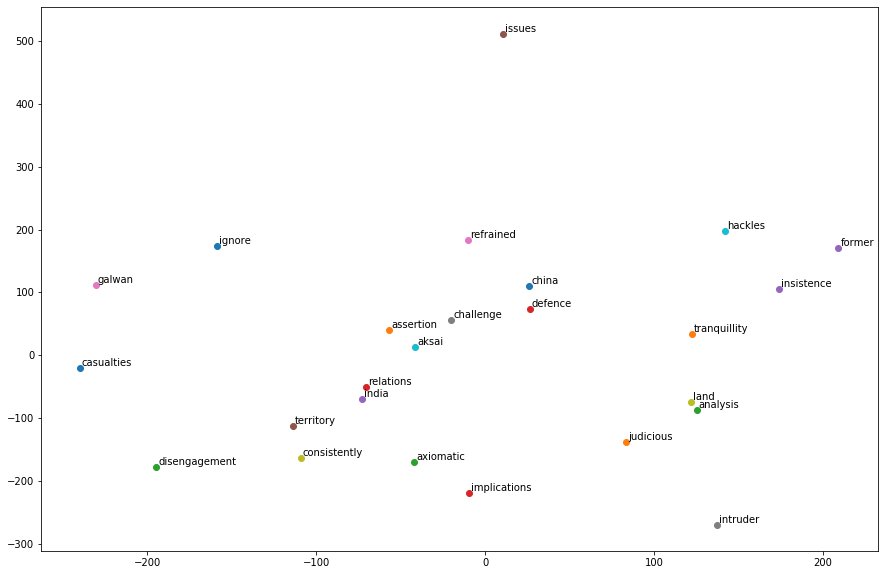

In [18]:
# Function to plot a 2D graph of some words
from sklearn.manifold import  TSNE
vocab = ['casualties','judicious','disengagement','relations','former','territory','galwan','intruder','land',
         'hackles','ignore','assertion','analysis','implications','insistence','issues','refrained','challenge','consistently',
        'aksai','china','tranquillity','axiomatic','defence','india']
def tsne_graph(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=3, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,10)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_graph(model)